What is the model improvement of data-augmentation in regards to different types of data? (audio,images,tabular,tabular (low-dimensionalty))

# Creation of synthetic data

In [453]:
from matplotlib import pyplot as plt
from scipy.stats import randint
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from sklearn.datasets import make_moons, make_blobs, make_circles

In [441]:
amount_of_samples = 100

low_x1, high_x1 = 33,64
low_y1, high_y1 = 0,16
low_x2, high_x2 = 0,32
low_y2, high_y2 = 0,16

rx_1 = randint.rvs(low_x1, high_x1, size=int(amount_of_samples))
ry_1 = randint.rvs(low_y1, high_y1, size=int(amount_of_samples))
rx_2 = randint.rvs(low_x2, high_x2, size=int(amount_of_samples/2))
ry_2 = randint.rvs(low_y2, high_y2, size=int(amount_of_samples/2))

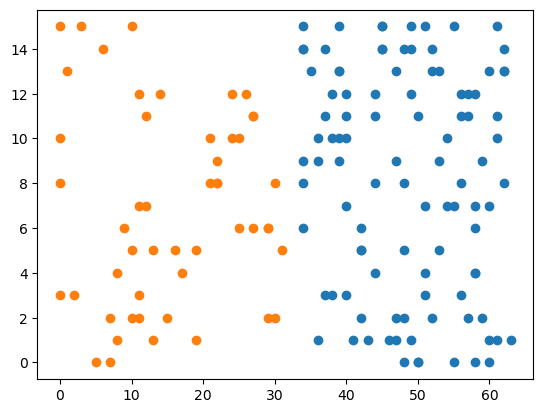

In [442]:
group_nr0 = ["0"] * amount_of_samples
group_nr1 = ["1"] * int(amount_of_samples/4)
first_group = list(zip(rx_1, ry_1, group_nr0))
second_group = list(zip(rx_2, ry_2, group_nr1))



plt.scatter(rx_1, ry_1)
plt.scatter(rx_2, ry_2)
plt.show()

In [443]:
for list_elem in second_group:
    first_group.append(list_elem)
print(first_group)

[(44, 4, '0'), (48, 0, '0'), (40, 10, '0'), (46, 1, '0'), (51, 3, '0'), (56, 8, '0'), (56, 3, '0'), (55, 0, '0'), (60, 0, '0'), (48, 2, '0'), (54, 7, '0'), (36, 1, '0'), (53, 9, '0'), (62, 14, '0'), (57, 2, '0'), (34, 14, '0'), (51, 15, '0'), (40, 7, '0'), (36, 9, '0'), (40, 11, '0'), (34, 8, '0'), (42, 2, '0'), (34, 14, '0'), (58, 7, '0'), (47, 9, '0'), (39, 10, '0'), (53, 13, '0'), (61, 1, '0'), (50, 0, '0'), (41, 1, '0'), (60, 13, '0'), (52, 14, '0'), (39, 15, '0'), (34, 9, '0'), (47, 2, '0'), (35, 13, '0'), (40, 3, '0'), (55, 15, '0'), (53, 5, '0'), (45, 15, '0'), (50, 11, '0'), (49, 1, '0'), (63, 1, '0'), (37, 11, '0'), (37, 3, '0'), (34, 6, '0'), (55, 7, '0'), (37, 14, '0'), (62, 8, '0'), (52, 13, '0'), (60, 1, '0'), (43, 1, '0'), (52, 2, '0'), (44, 12, '0'), (62, 13, '0'), (40, 12, '0'), (59, 2, '0'), (45, 15, '0'), (60, 7, '0'), (58, 12, '0'), (42, 5, '0'), (39, 13, '0'), (49, 12, '0'), (38, 10, '0'), (45, 14, '0'), (61, 11, '0'), (62, 13, '0'), (47, 13, '0'), (36, 10, '0'), (4

In [444]:
block_data = pd.DataFrame(first_group, columns  =['x', 'y', "group"])

In [445]:
display(block_data)

,x,y,group
0,44,4,0
1,48,0,0
2,40,10,0
3,46,1,0
4,51,3,0
...,...,...,...
120,13,1,1
121,27,6,1
122,19,5,1
123,2,3,1


imbalance #class1/#class2
2
Averaged score for no resampling: 
0.9743362831858408
Averaged score for rand resampling: 
0.9787610619469028
Averaged score for smote resampling: 
0.975221238938053
imbalance #class1/#class2
4
Averaged score for no resampling: 
0.9776595744680853
Averaged score for rand resampling: 
0.9819148936170213
Averaged score for smote resampling: 
0.9819148936170213
imbalance #class1/#class2
8
Averaged score for no resampling: 
0.9726190476190476
Averaged score for rand resampling: 
0.955952380952381
Averaged score for smote resampling: 
0.9666666666666666


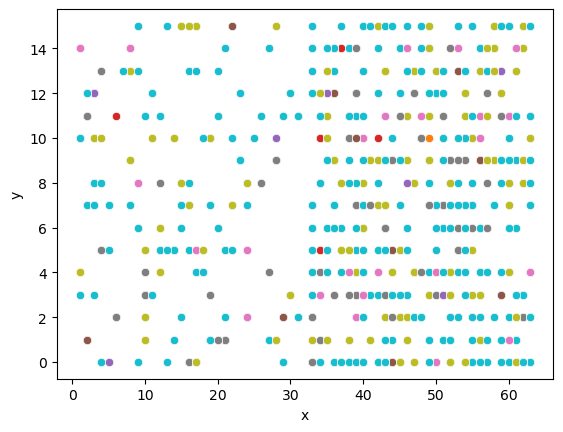

In [454]:


minority_class_imbalance = [2,4,8]

amount_of_samples = 150

low_x1, high_x1 = 33,64
low_y1, high_y1 = 0,16
low_x2, high_x2 = 0,32
low_y2, high_y2 = 0,16

for imbalance in minority_class_imbalance:
    average_acc_none = 0
    average_acc_rand = 0
    average_acc_sm = 0
    average_acc_ada = 0
    print("imbalance #class1/#class2")
    print(imbalance)
    rx_1 = randint.rvs(low_x1, high_x1, size=int(amount_of_samples))
    ry_1 = randint.rvs(low_y1, high_y1, size=int(amount_of_samples))
    rx_2 = randint.rvs(low_x2, high_x2, size=int(amount_of_samples/imbalance))
    ry_2 = randint.rvs(low_y2, high_y2, size=int(amount_of_samples/imbalance))

    group_nr0 = ["0"] * amount_of_samples
    group_nr1 = ["1"] * int(amount_of_samples/imbalance)
    first_group = list(zip(rx_1, ry_1, group_nr0))
    second_group = list(zip(rx_2, ry_2, group_nr1))

    for list_elem in second_group:
        first_group.append(list_elem)

    block_data = pd.DataFrame(first_group, columns  =['x', 'y', "group"])



    for random_state_idx in range(0,10):
        train, test = train_test_split(block_data, test_size=0.5, random_state= random_state_idx)
        X_train = train.drop(['group'], axis=1)
        X_test = test.drop(['group'], axis=1)

        y_train = train['group']
        y_test = test['group']
        
        
        
        
        clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
        clf.fit(X_train, y_train)
        y_pred =  clf.predict(X_test)

        average_acc_none = accuracy_score(y_pred, y_test) + average_acc_none

        ros = RandomOverSampler(random_state=42)
        X_res_rand, y_res_rand = ros.fit_resample(X_train, y_train)


        clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
        clf.fit(X_res_rand, y_res_rand)
        y_pred =  clf.predict(X_test)

        average_acc_rand = accuracy_score(y_pred, y_test) + average_acc_rand




        sm = SMOTE(random_state=42)
        X_res_sm, y_res_sm = sm.fit_resample(X_train, y_train)

        clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
        clf.fit(X_res_sm, y_res_sm)
        y_pred =  clf.predict(X_test)

        average_acc_sm = accuracy_score(y_pred, y_test) + average_acc_sm


    print("Averaged score for no resampling: ")
    print(average_acc_none/10)

    print("Averaged score for rand resampling: ")
    print(average_acc_rand/10)

    print("Averaged score for smote resampling: ")
    print(average_acc_sm/10)



    

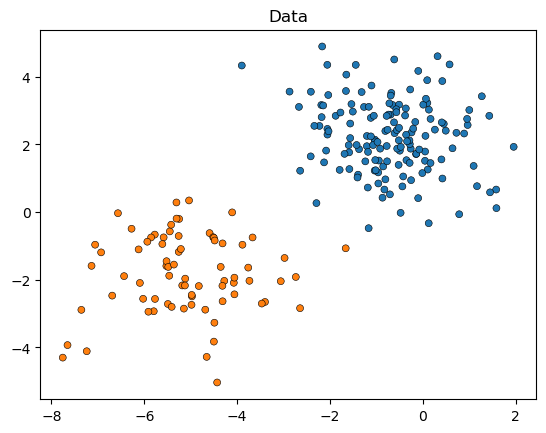

In [470]:
X, y = make_blobs( random_state=1, n_samples=[150,75] , center_box=[-5,5] , cluster_std= 1.1)

sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y, marker="o", s=25, edgecolor="k", legend=False
).set_title("Data")
plt.show()

In [ ]:
from imblearn.pipeline import make_pipeline
minority_class_imbalance = [2,4,8]

amount_of_samples = 300


models = {
    "No sampling ": make_pipeline(StandardScaler(),SVC(gamma='auto')),
    "Random sampler ": make_pipeline(StandardScaler(),RandomOverSampler(random_state=42),SVC(gamma='auto')),
    "SMOTE sampler ": make_pipeline(StandardScaler(),SMOTE(random_state=42),SVC(gamma='auto')),
}

for imbalance in minority_class_imbalance:
    print("-------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------")
    print("Imbalance rate: ")
    print(imbalance)
    datasets = [
        make_moons(noise=0.2, random_state=0, n_samples=[amount_of_samples,int(amount_of_samples/imbalance)]),
        make_circles(noise=0.1, factor=0.5, random_state=1, n_samples=[amount_of_samples,int(amount_of_samples/imbalance)]),
        make_blobs( random_state=1,  center_box=[-5,5] , cluster_std= 1.1, n_samples=[amount_of_samples,int(amount_of_samples/imbalance)])
    ]
    datasets_name = ["moons", "circles", "blobs"]
    
    for ds_cnt, ds in enumerate(datasets):
        print("-------------------------------------------------------------------------------------------------------")
        print("-------------------------------------------------------------------------------------------------------")
        print("Type of dataset: ")
        print(datasets_name[ds_cnt])
        for (title,model) in models.items():
            average_score = 0
            print("-------------------------------------------------------------------------------------------------------")
            print("Type of oversampler:")
            print(title)
            for random_state_idx in range(0,10):
                X, y = ds
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.5, random_state=random_state_idx
                )
                model.fit(X_train, y_train)
                y_pred =  model.predict(X_test)
                average_score = average_score + accuracy_score(y_pred, y_test)
            print("Average score: ")
            print(average_score/10)
                

        
    
    
    